<a href="https://colab.research.google.com/github/CadeJMock/taxi-cost-model/blob/main/final_project_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCI-497 - Final Project**
### Group 2 - Members: Cade Mock (50350556)

## **Taxi Congestion and Cost Predictions using Machine Learning and Data Analysis**

This project will be using yellow Taxi Trip Records from January 2025. The data is from [TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). TLC stands for the [New York City Taxi and Limousine Commission](https://en.wikipedia.org/wiki/New_York_City_Taxi_and_Limousine_Commission), which is an agency of the New York City government that licenses and regulates the medallion taxis and for-hire vehicle industries, including app-based companies such as Uber and Lyft.

Here are some **useful links** for understanding and navigating the data:</br></br>

1. [TLC Trip Records User Guide](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf) - _A comprehensive guide and explanation on TLC, and how to navigate the data; alongside more in depth explanations of the data._</br>

2. [Data Dictionary - Yellow Taxi Trip Records](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) - _Data table explaining each field that the data which I am using has.*_ </br></br>

_*Note that for the LocationID's, I am also using a "taxi-zone-lookup.csv" provided by this [GitHub repository](https://github.com/fivethirtyeight/uber-tlc-foil-response/blob/master/uber-trip-data/taxi-zone-lookup.csv). I have double checked every code, cross referencing some of the TLC data, to confirm that each code lines up correctly._</br></br>

## **Exploratory Data Analysis**

**I will start by going over the fields in the dataset, and getting an understanding of what may be most useful.**

1. **VendorID** - A code indicating the TPEP provider that provided the record.
2. **tpep_pickup_datetime** - The date and time when the meter was engaged.
3. **tpep_dropoff_datetime** - The date and time when the meter was disengaged.
4. **Passenger_count** - The number of passengers in the vehicle. (This is a driver-entered value)
5. **Trip_distance** - The elapsed trip distance in miles reported by the taximeter.
6. **PULocationID** - TLC Taxi Zone in which the taximeter was engaged.
7. **DOLocationID** - TLC Taxi Zone in which the taximeter was disengaged.
8. **RateCodeID** - The final rate code in effect at the end of the trip.
9. **Store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
10. **Payment_type** - A numeric code signifying how the passenger paid for the trip.
11. **Fare_amount** - The time-and-distance fare calculated by the meter.
12. **Extra** - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
13. **MTA_tax** - $0.50 MTA tax that is automatically triggered based on the metered rate in use
14. **Improvement_surcharge** - $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
15. **Tip_amount** - Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
16. **Tolls_amount** - Total amount of all tolls paid in trip.
17. **Total_amount** - The total amount charged to passengers. Does not include cash tips.
18. **Congestion_Surcharge** - Total amount collected in trip for NYS congestion surcharge.
19. **Airport_fee** - $1.25 for pick up only at LaGuardia and John F. Kennedy Airports</br></br>



Let me start by restating my purpose with choosing this topic. I want to build a model that's use will be predicting the cost of a taxi, as well as the availability of taxis - given other inputs such as pick up location, drop off location, time, and other relevant features to be discovered. In the end, my hope is to have a user input their expected variables and the model should output a reasonably accurate result (for now, lets say within 10% would be amazing). Surprisingly high taxi fees have never been helpful for anyone, so a model like this would help people make decisions on when to take yellow taxis as well as helping them compare the price to other options.</br></br>
I will list some obviously unimportant fields that I can most likely remove, ambiguous fields that will need to be tested for correlation, and important fields that very obviously will contribute to my model's predictions. Please note that this is just preliminary intuitive reasoning. I will be performing correlation tests.</br></br></br>

### Field Intuitive Analysis:

**Unimportant Fields:**</br>
VendorID - *This field tells us which TPEP provider provided the taxi record, either Creative Mobile Technologies or VeriFone. This is seemingly completely unimportant or related to my end goal for my model, as what company provides the data does not tell anything about the actual trip.*</br></br>
Passenger_count - *The PDF notes that this field is a driver-entered value, and some prior person experience as well as some online research tells me that fares are not affected by the total number of passengers, as long as the vehicle's capacity isn't exceeded. Something that is driver entered and non verifiable shouldn't effect the price predictions of trips - but it may be relevant for taxi availability/congestion; if taxis have a higher passenger count during certain times, that may mean less individual taxis are being taken.*</br></br>
Store_and_fwd_flag - *This flag simply tells us that the taxi did not have a server connection at the time of the trip finishing, this does not effect any other detail of the trip (such as datetime pickup or dropoff). So, it is effectively useless for my goals.*</br></br>
Payment_type - *The type of payment a person uses to pay for their trip is not relevant to my goal of predicting the cost of a trip. Some services may give a small discount for cash at times, but I do not believe yellow taxis do this in New York City. If there seems to be a discount for cash payments, then that can be added post-model results to be displayed to the user.*</br></br>
Tip_amount - *Since, again, my goal is to predict trip costs, something like card or cash tips will simply throw my model off. This is because tips are not mandatory or required, and different people tip differently and randomly.*</br></br>

**Ambiguous Fields:**</br>
Trip_distance - *Since we have the pick up and drop off location IDs, alongside the fare amount and other such fields, this field may be a lot less important than I may intuitively think.*</br></br>
RateCodeID - *I would need to do some counting of the data using Python, but mostly all trips will be metered trips, so I may consider removing every RateCodeID that is a 5 or a 6. RateCodeIDs 2 and 3 involve airports, which are accounted for in other fields, and lastly, number 4 is for a few counties outside of the New York City limits. I'm not really sure yet how these RateCodeIDs will correlate given we have other information that is doing some of the work already, but maybe it will be useful for clarifying some data points from each other.*</br></br>
MTA_tax - *This tax is a flat tax applied to all metered trips. The only RateCodeID's this would not apply to would be Negotiated fare and Group ride (5 and 6). So, seemingly, this field is not useful in predicting taxi costs, but should be applied after the prediction as most rides are metered, as most people do not do negotiated fare or group ride trips.*</br></br>
Improvement_surcharge - *Similar to the MTA_tax, this is applied to all metered trips which is a very large majority of all taxi trips. It should not be included in training the model, but added on afterwards for the user.*</br></br>


**Important Fields:**</br>
tpep_pickup_datetime/tpep_dropoff_datetime - *The pick up and drop off times of the taxi's will be very important in predicting when congestion is likely, and what fares seem to be like during certain times of the day*</br></br>
PULocationID/DOLocationID - *These two fields are very important as there are charges for certain areas such as airports, as well as tolls that a taxi might have to go through given the route between two places.*</br></br>
Fare_amount - *The Fare_amount will give us calculated fare rate given time and distance of the trip. This will be important in predicting costs of future rides.*</br></br>
Extra - *This field includes specifically the $0.50 and $1 rush hour and overnight charges respectively. This is important when training the model because certain times should correlate with a rush hour or overnight charge to be added to the total predicted amount.*</br></br>
Tolls_amount - *This is important as tolls will relate to the pick up and drop off locations, and the model should be able to learn a lot of routes that will have tolls added onto them.*</br></br>
Total_amount - *This field will be our target field for the model. I am attempting to predict the total amount a taxi will cost given other features.*</br></br>
Congestion_Surcharge - *This field will inform the model on when the streets will be the most and least congested. The values are either -2.5, 0, or 2.5; however, a lot of the taxi trips are during congested times, so it will probably be more beneficial in informing the model when the city is not congested.*</br></br>
Airport_fee - *This field is important for helping the model correlate the pickup location ID's of LaGurdia and John F. Kennedy Airports, and hopefully add on the 1.25 in the prediction. Clearing any ambiguity from the Total_amount field in the end.*</br></br>

### Now, lets look at the data using Python

In [ ]:
import pandas as pd

# load the yellow taxi dataset
df = pd.read_csv("csv/yellow_tripdata-2025-01.csv")
# print a bunch of preliminary info
print(df.isnull().sum())
df.head()
df.info()
df.describe(include='all')

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   tpep_pickup_datetime   1048575 non-null  object 
 2   tpep_dropoff_datetime  1048575 non-null  object 
 3   passenger_count        1048575 non-null  int64  
 4   trip_distance          1048575 n

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,1.048575e+06,1048575,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,16931,16969,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/9/2025 17:58,1/8/2025 18:16,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,177,174,NaN,NaN,NaN,1045818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.782692e+00,NaN,NaN,1.356578e+00,3.297182e+00,2.394654e+00,NaN,1.657172e+02,1.647961e+02,1.251289e+00,1.769538e+01,1.433244e+00,4.717829e-01,3.386346e+00,5.312568e-01,9.448633e-01,2.657714e+01,2.206728e+00,1.280557e-01
std,4.184745e-01,NaN,NaN,8.111879e-01,6.449415e+00,1.121492e+01,NaN,6.339551e+01,6.948868e+01,6.147276e-01,1.970195e+01,1.863940e+00,1.542389e-01,3.957860e+00,2.210915e+00,3.094786e-01,2.440391e+01,9.310548e-01,4.797841e-01
min,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+02,-7.500000e+00,-5.000000e-01,-8.600000e+01,-1.269400e+02,-1.000000e+00,-9.010000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,NaN,NaN,1.000000e+00,9.700000e-01,1.000000e+00,NaN,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.530000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,NaN,NaN,1.000000e+00,1.630000e+00,1.000000e+00,NaN,1.620000e+02,1.620000e+02,1.000000e+00,1.210000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,1.999000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,NaN,NaN,1.000000e+00,3.100000e+00,1.000000e+00,NaN,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.150000e+00,0.000000e+00,1.000000e+00,2.845000e+01,2.500000e+00,0.000000e+00


We can see in the dataset, there are 1048575 different entries, and none of them hold incomplete null values. I already knew this data would be high quality because it is from an official New York City government agency, in a very high profit industry, so this confirms that the data remains as good as my assumptions.</br></br>

Next, we can note the data types of our columns. Mostly all of them are integer types but we have three object types. One object type is the "store_and_fwd_flag" data type which is unimportant to my goal so I will remove that before training the model. The next two object types are the tpep_pickup_datetime and tpep_dropoff_datetime fields. These fields are dates and times formatted as "*M/D/YYYY HOUR:MINUTES*", the time is in the 24-hour clock format. Here are some examples: "*1/1/2025 0:18", '1/24/2025 14:36*".</br></br>

The best thing to do is to split up the date and the time. Since I am only using data from January 2025 in this model/project, I can effectively remove the month and year from the date leaving us with just the day. Next, since the day itself isn't entirely helpful unless it is a holiday (for example, Martin Luther King Jr. Day on January 20th, 2025), I think I should also write a script to add another column specifying if it was a Weekend or a Weekday, which might help the model predict better for congestive-ness of the city and how active certain times of the night are on different days. I could do this by manually making a dictionary of numbers matching to days of the week (since I only have to deal with January 2025), and then run that script over my entire dataset to get the new column. I also want to note that since I am doing this for one month only, I am able to hand pick days that I know to be outliers, so I am going to be removing data entries that have the pickup date on January 20th, as that is the only major holiday in January which would effect things. I would simply add a disclaimer to the user letting them know that Holidays may effect cost.</br></br>

**The new columns should be:**</br>
pickup_date : DAY_OF_THE_MONTH (picked up)</br>
pickup_day : DAY_OF_THE_WEEK (picked up)</br>
pickup_time : TIME (picked up)</br>
dropoff_date : DAY_OF_THE_MONTH (dropped off)</br>
dropoff_day : DAY_OF_THE_WEEK (dropped off)</br>
dropoff_time : TIME (dropped off)</br></br>

It feels slightly redundant including the dropoff date and times, but I think it may help the model understand the overnight charges that apply. However, it may confuse the model on the pricing between different days of the week, but hopefully the time portion will help with that.

In [ ]:
# remove any duplicates (in case)
df = df.drop_duplicates()

# Also, just in good practices, since this is a 1-million entry dataset. I can not be sure if there are some random data
# entries with missing or NaN values, so I will drop any entries that don't have at least 70% of their values filled.
# reference: https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python
df = df.dropna(thresh=int(df.shape[1] * 0.7))

Another thing after viewing my dataset, trips that were cancelled, refunded, calculated incorrectly, or likewise can show as negative amounts. I should go through my data and remove every entry that has a negative total_amount, and save the dataset before continuing further analysis. I am not simply getting the absolute values of these, because some of them are adjusted due to incorrect fare rates. For example, one entry I saw had the fare set to "60", when it probably should have been "6", and the total amount was something like "-48" - so since I have no way of knowing why an entry would be negative, so its best to remove them.

In [ ]:
# remove entries with negative total_amount
df_cleaned = df[df["total_amount"] >= 0]

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# df_cleaned = df.head(20000) # CAP THE ENTRIES TO 20,000. THIS WILL SPEED UP THE DATA ANALYSIS AND OTHER THINGS UNTIL MODEL IS READY. REMOVE LATER                                         !!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# save a new, cleaned, version of the dataset
df_cleaned.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False)
print("Cleaned dataset saved as 'yellow_tripdata-2025-01-cleaned.csv")

# set the dataframe to the new cleaned version for future Python
df  = pd.read_csv("csv/yellow_tripdata-2025-01-cleaned.csv")

Cleaned dataset saved as 'yellow_tripdata-2025-01-cleaned.csv


Next, I am going to drop features that I know will be useless to my model. Remember, I am still keeping the original excel sheet in case I need to revert anything and experiment.

The columns I will drop, as mentioned before in the "Unimportant columns" list, are VendorID, store_and_fwd_flag, payment_type, passenger_count, and tip_amount.

In [ ]:
file_path = "csv/yellow_tripdata-2025-01-cleaned.csv" # had to use file_path because I was running into issues with saving over the file for some reason
df = pd.read_csv(file_path) # make sure my df is set to the right file

# print the columns we have before attempting to drop any
print("Before dropping:", df.columns.tolist())

# # drop the columns
columns_to_drop = ["VendorID", "store_and_fwd_flag", "payment_type", "passenger_count", "tip_amount"]
df = df.drop(columns=columns_to_drop)

# check to make sure columns dropped
print("After dropping:", df.columns.tolist())


df.to_csv(file_path, index=False)
print(f"File '{file_path}' has been updated and saved.")

Before dropping: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
After dropping: ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
File 'csv/yellow_tripdata-2025-01-cleaned.csv' has been updated and saved.


### Graphs and Correlation

I will be using matplotlib and seaborn to go through some graphs, plots, maps, and other checks for different important features. Most importantly I want to look at some outliers and start removing them.

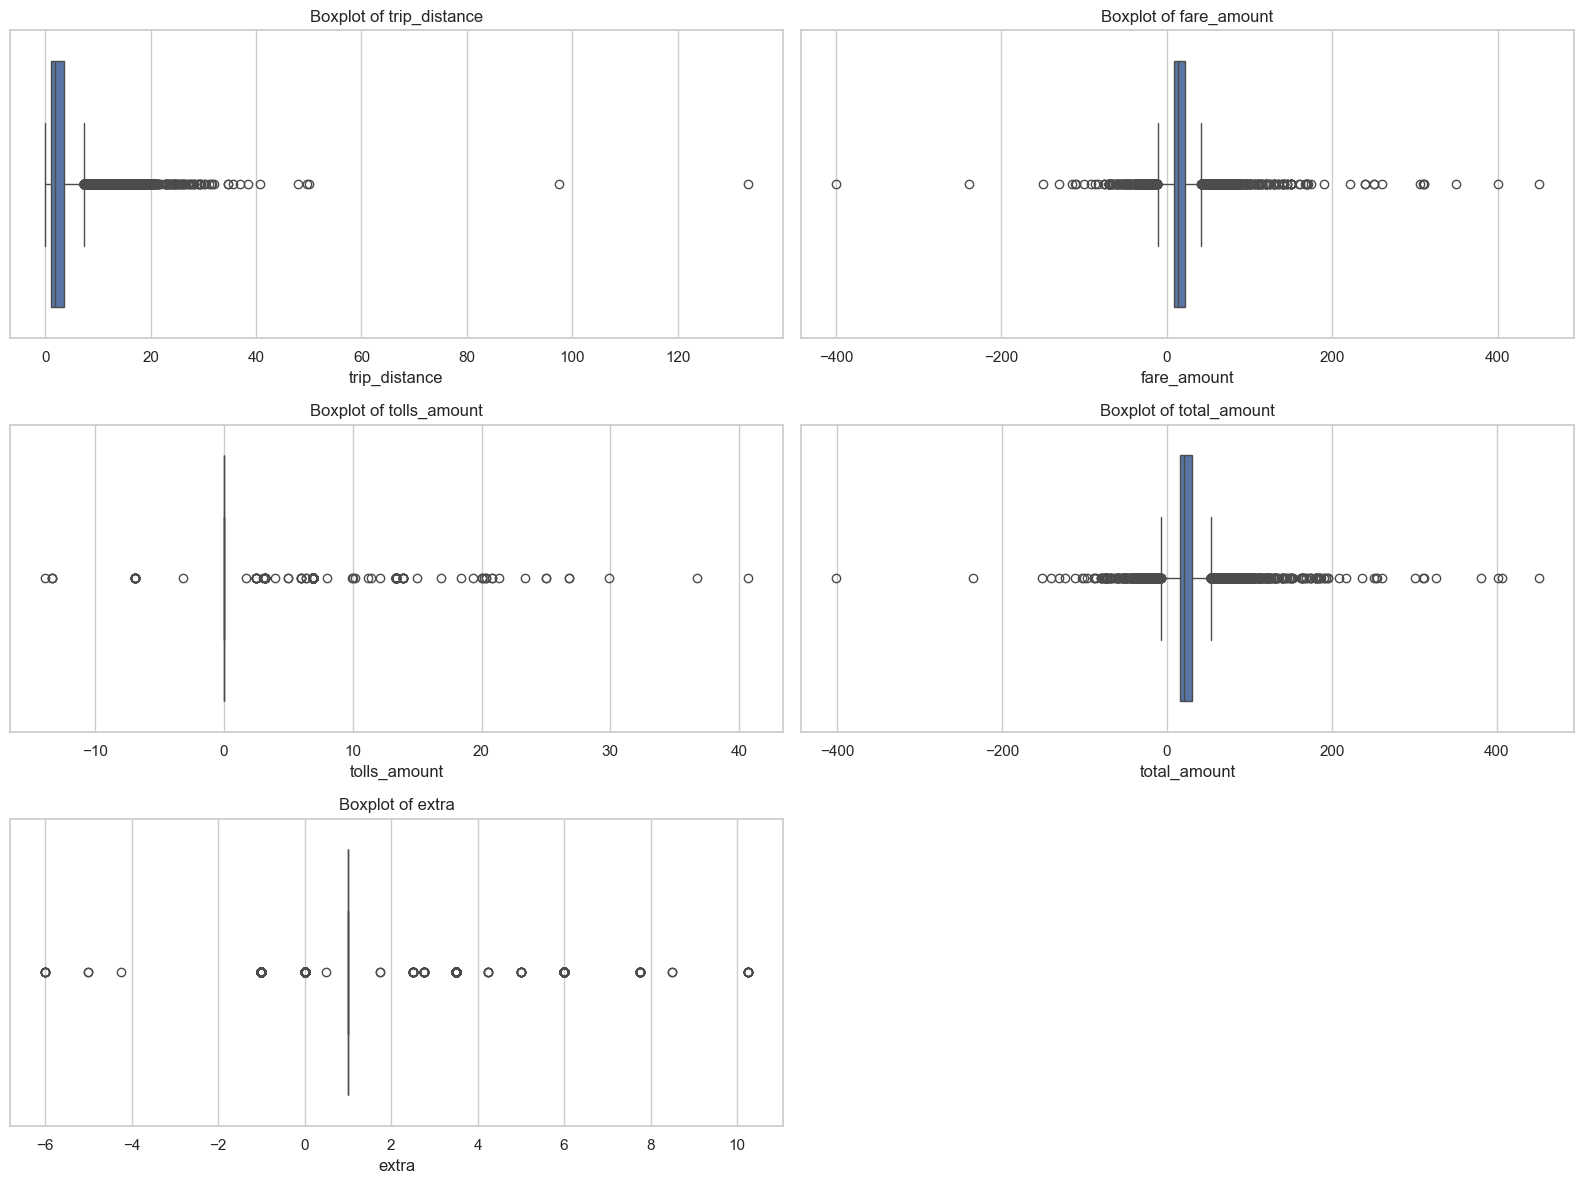

In [ ]:
# First, some boxplots to detect outliers. I believe we will only see outliers in the following fields:
# passengers, trip_distance, fare_amount, tip_amounts, tolls_amount, and total_amounts, extra.
# The rest of the fields don't really have the option to be outliers as they are locked in select few options/ranges.

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid") # keep the same theme for each plot

# list of the columns I want to analyze
columns = ['trip_distance', 'fare_amount', 'tolls_amount', 'total_amount', 'extra']

# suplots
plt.figure(figsize=(16, 12))

# for loop to generate each plot for each feature
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout() # organize them better, otherwise they appear over each other at some points
plt.show()

Woah! There are a ton of outlier data in my dataset. I need to perform some IQR-based outlier removal to remove these data points above and below the 75th and 25th percentile respectively. This will be very useful as there are over a million entries in my dataset, so these graphs won't be readable until I remove them.

In [ ]:
# columns to clean using IQR, these are all the columns that aren't in a set range which means they can be extreme
columns = ['trip_distance', 'fare_amount', 'tolls_amount', 'total_amount', 'extra']

# function to remove outliers using IQR method from our class/statistics.
# this function is useful in case I decide to include a different column later on and need to remove outliers.
# reference: https://stackoverflow.com/questions/50461349/how-to-remove-outlier-from-dataframe-using-iqr
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# remove outliers for each specified column
for col in columns:
    df = remove_outliers(df, col)

# Save the cleaned dataset
df.to_csv(file_path, index=False)

print(f"Outliers removed using IQR, file updated: {file_path}")


Outliers removed using IQR, file updated: csv/yellow_tripdata-2025-01-cleaned.csv


Now, lets recreate those boxplots.

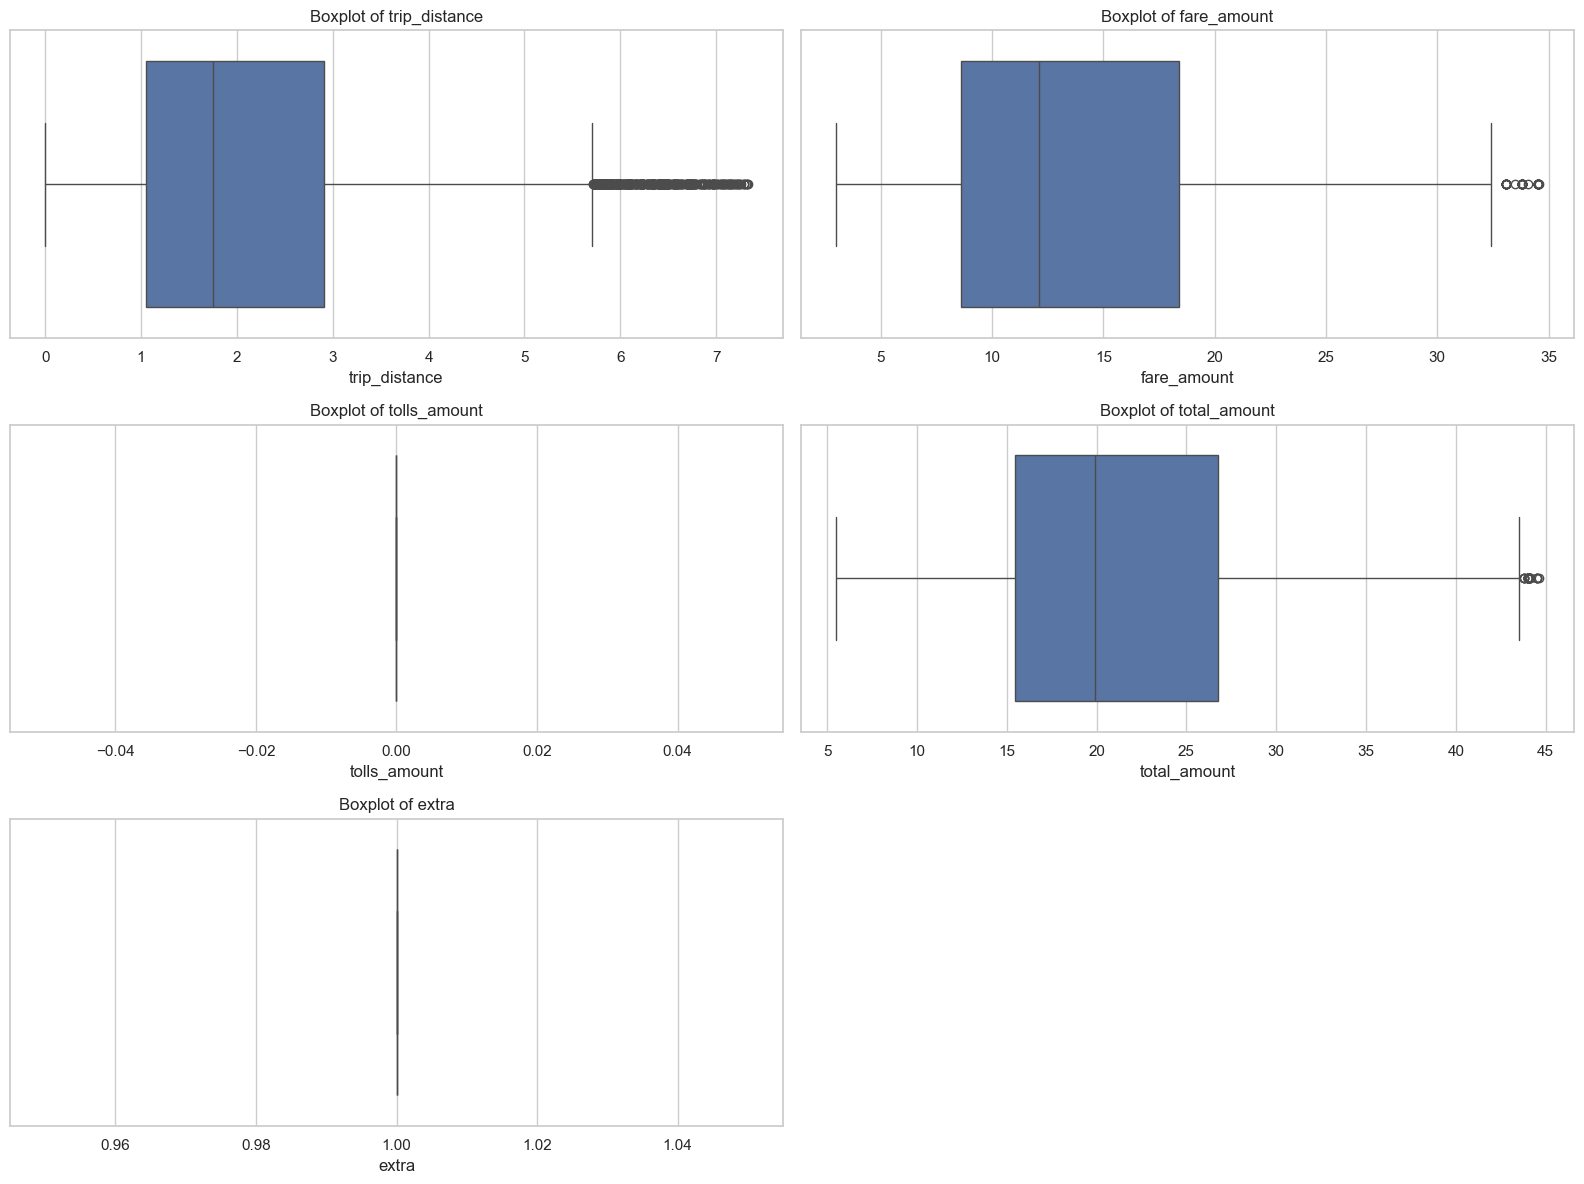

In [ ]:
sns.set_theme(style="whitegrid") # keep the same theme for each plot

# list of the columns I want to analyze
columns = ['trip_distance', 'fare_amount', 'tolls_amount', 'total_amount', 'extra']

# suplots
plt.figure(figsize=(16, 12))

# for loop to generate each plot for each feature
for i, column in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout() # organize them better, otherwise they appear over each other at some points
plt.show()

These graphs are looking a lot better. One thing I notice though is that tolls_amount pretty much got removed of every data point. Given the vast number of taxi trip entries I have, and the very low number of taxis that will pass through toll roads in New York City, it makes sense that after performing IQR outlier removal on the column there would be no data point left above 0.00. I will run a python line to check if this is the case, and then remove it if so, since obviously it will not be a predicting feature if all the entries are the same, or very few differ.

In [ ]:
tolls_above_zero = df[df["tolls_amount"] > 0]
print(tolls_above_zero[["tolls_amount"]])

Empty DataFrame
Columns: [tolls_amount]
Index: []


The code above confirms that removing outliers on the tolls_amount column has made every entry a zero. We can now proceed with dropping the column

In [ ]:
df = df.drop(columns="tolls_amount")
df.to_csv(file_path, index=False)
print(f"File '{file_path}' has been updated and saved.")

File 'csv/yellow_tripdata-2025-01-cleaned.csv' has been updated and saved.


#### Now lets move onto more graphs, after our outliers and other data points have been dealt with.

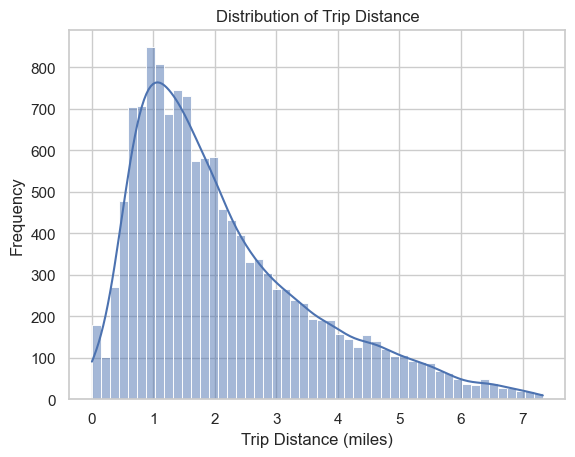

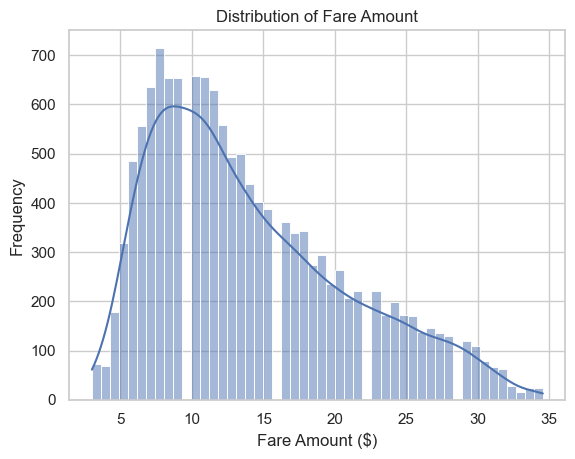

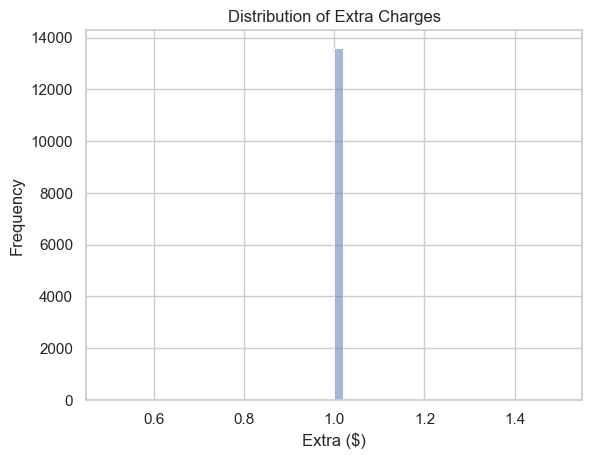

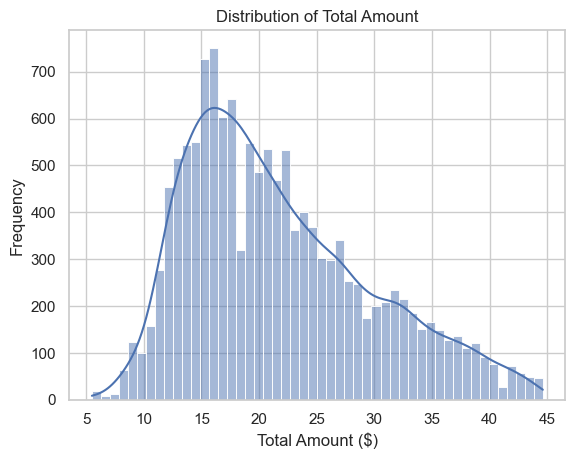

In [ ]:
# These histplots will show us some information on trip distances, fare amounts, extra, and total amounts.

# reference: https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

# Histogram for trip_distance
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title("Distribution of Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.show()

# Histogram for fare_amount
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Distribution of Fare Amount")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

# Histogram for extra
sns.histplot(df['extra'], bins=50, kde=True)
plt.title("Distribution of Extra Charges")
plt.xlabel("Extra ($)")
plt.ylabel("Frequency")
plt.show()

# Histogram for total_amount
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribution of Total Amount")
plt.xlabel("Total Amount ($)")
plt.ylabel("Frequency")
plt.show()

All of these histograms are showing fairly normal distributions. Since these were the few volatile columns that weren't specifically tied to a set range, its a very good sign to see them fall neatly into these curves (aside from 'extra', but I have gained information on the range and distribution of the mysterious 'extra' column).</br></br>

Before moving onto other graphs and correlations. I think it is time to remove and note some "unimportant" columns here. As well as start converting the pick up and drop off dates, days, and times like I have mentioned before.

**IMPORTANT!!!!!**</br>
These columns/entries are going to be removed, but they are the same in every entry. When I drop the bolded columns, I should also subtract them from the total_amount column to balance things out:
- **mta_tax** -> 0.5
- **improvement_surcharge** -> 1.0
- RatecodeID == 5 || RatecodeID == 6

In [ ]:
# subtract the total_amount column by 1.5 for every entry.
# This is to adjust for the mta_tax and improvement_surchage columns we are dropping
df["total_amount"] = (df["total_amount"] - 1.5).round(2)

# drop the mta_tax and improvement_surcharge columns
df = df.drop(columns=["mta_tax", "improvement_surcharge"])

# drop rows where RatecodeID is 5 or 6
df = df[~df["RatecodeID"].isin([5, 6])]

df.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False)
print("mta_tax and improvement_surcharge columns dropped. total_amount adjusted by -1.5.")
print("Entries where RatecodeID = 5 or 6 are removed.")

mta_tax and improvement_surcharge columns dropped. total_amount adjusted by -1.5.
Entries where RatecodeID = 5 or 6 are removed.


Before we move on, I noticed that after removing the rate codes for 5 and 6 - most of them were the rate code of 1. Let's check how many trip entries we actually have where the rate code is not 1.

In [ ]:
# count how many rows have RatecodeID != 1
count = df[df["RatecodeID"] != 1].shape[0]

print("Number of entries with RatecodeID != 1:", count)


Number of entries with RatecodeID != 1: 18


We only have 5,621 entries where the RatecodeID is not 1 (the most common and standard type of taxi ride). In order to help out future training out, lets remove every entry where the RatecodeID is not one, and then drop the column all together.

In [ ]:
# keep only the rose where RatecodeID == 1
df = df[df["RatecodeID"] == 1]
print("Selected all entries where RatecodeID == 1")
# drop the RatecodeID column altogether
df.drop(columns=["RatecodeID"], inplace=True)
print("Dropped the RatecodeID column.")

df.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False) # saving in place, to make sure we are dropping and removing everything

Selected all entries where RatecodeID == 1
Dropped the RatecodeID column.


In [ ]:
# Now, we can start separating the date and times, creating new columns for everything.
# I will start from Monday, 1 and go through Sunday, 7. So higher numbers will be more towards the weekend.
# I will also convert the time to seconds after midnight for now. Can change this later into other common formats such as hour + minute as flot (13.75 for 1:45PM)

# convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df["tpep_pickup_datetime"], format="%m/%d/%Y %H:%M")
df['tpep_dropoff_datetime'] = pd.to_datetime(df["tpep_dropoff_datetime"], format="%m/%d/%Y %H:%M")

# extract them to new columns
df['pickup_date'] = df['tpep_pickup_datetime'].dt.day
df['pickup_day'] = df['tpep_pickup_datetime'].dt.weekday + 1 # Monday=1, Sunday=7
df['pickup_time'] = (df['tpep_pickup_datetime'].dt.hour * 3600 + df['tpep_pickup_datetime'].dt.minute * 60)

df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.day
df['dropoff_day'] = df['tpep_dropoff_datetime'].dt.weekday + 1
df['dropoff_time'] = (df['tpep_dropoff_datetime'].dt.hour * 3600 + df['tpep_dropoff_datetime'].dt.minute * 60)

# now we can drop the original datetime columns
df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# lastly, not to forget - since January 20th in 2025 was a holiday (Martin Luther King Jr. Day), we should remove it since it would be an outlier
df = df[df['pickup_day'] != 20]

df.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False)
# preview the new columns
print(df.head())

    trip_distance  PULocationID  DOLocationID  fare_amount  extra  \
3            0.52           244           244          7.2    1.0   
4            0.66           244           116          5.8    1.0   
5            2.63           239            68         19.1    1.0   
9            1.71           237           262         11.4    1.0   
10           2.29           237            75         11.4    1.0   

    total_amount  congestion_surcharge  Airport_fee  pickup_date  pickup_day  \
3            8.2                   0.0          0.0            1           3   
4            6.8                   0.0          0.0            1           3   
5           22.6                   2.5          0.0            1           3   
9           14.9                   2.5          0.0            1           3   
10          14.9                   2.5          0.0            1           3   

    pickup_time  dropoff_date  dropoff_day  dropoff_time  
3           840             1            3   

In [ ]:
print(df.head())
df.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False)

    trip_distance  PULocationID  DOLocationID  fare_amount  extra  \
3            0.52           244           244          7.2    1.0   
4            0.66           244           116          5.8    1.0   
5            2.63           239            68         19.1    1.0   
9            1.71           237           262         11.4    1.0   
10           2.29           237            75         11.4    1.0   

    total_amount  congestion_surcharge  Airport_fee  pickup_date  pickup_day  \
3            8.2                   0.0          0.0            1           3   
4            6.8                   0.0          0.0            1           3   
5           22.6                   2.5          0.0            1           3   
9           14.9                   2.5          0.0            1           3   
10          14.9                   2.5          0.0            1           3   

    pickup_time  dropoff_date  dropoff_day  dropoff_time  
3           840             1            3   

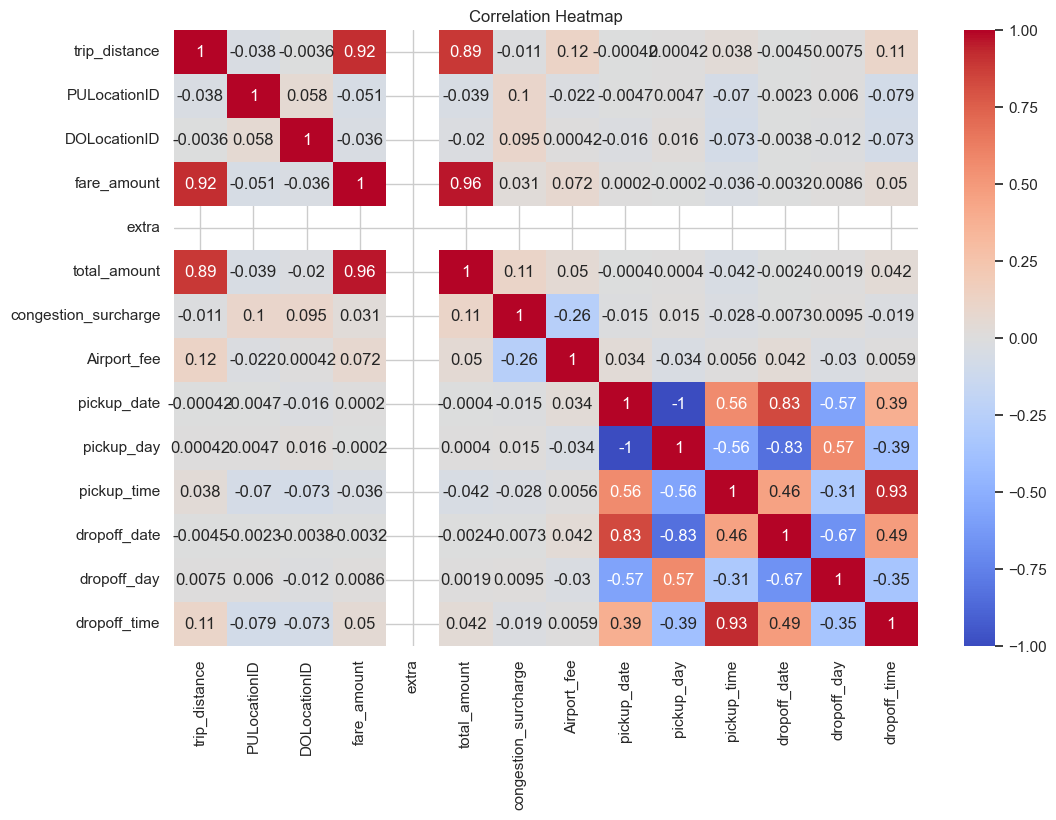

In [ ]:
numeric_cols = df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

####**Observatons from the Correlation Heatmap:**</br></br>

**1. Strong Positive Correlations:**
- trip_distance and fare_amount are correlated at 0.87, meaning longer trips result in higher fare amounts, which is expected.</br>
- trip_distance and total_amount are correlated at 0.82, which makes sense because fare_amount is also correlate highly, meaning that a longer trip distance usually highly correlates to a higher total amount paid by the person taking the taxi.</br>
- fare_amount and total amount are correlated by 0.93, which is highly expected because the fare amount is the largest factor in the total amount at the end of the trip in a normal taxi ride.</br></br>

**2. Negative Correlations:**

In [ ]:
from scipy.stats import skew, shapiro

skew_val = skew(df['trip_distance'].dropna())
print(f"Skewness of trip_distance: {skew_val}")

# Shapiro-Wilk Test for normality
stat, p = shapiro(df['trip_distance'].sample(5000))  # sampling for speed
print("p-value:", p)
if p < 0.05:
    print("Trip distance is significantly skewed.")


Skewness of trip_distance: 1.086617175982492
p-value: 1.6681354782642766e-47
Trip distance is significantly skewed.


Using the code above, we can see that at least one of our fields is significantly skewed.</br>
This means, specifically, that our trip values are mostly short but some some longer trips pull the mean to the right. This is confirming our data is not normally distributed - and we need to most likely act on this before we start doing any significant training. We can always reverse the normalization later to test for different results. Since our baselines will include things like linear regression, which assumes normality, its best we normalize it for now.</br></br>
For now, lets check the skewness of our fare_amount and total_amount fields before doing any normalization. (other numeric fields effect total amount, but we don't need to necessarily check their skewness due to them being in range of certain values)

In [ ]:
from scipy.stats import skew, shapiro

skew_val = skew(df['fare_amount'].dropna())
print(f"Skewness of fare_amount: {skew_val}")

# Shapiro-Wilk Test for normality
stat, p = shapiro(df['fare_amount'].sample(5000))  # sampling for speed
print("p-value:", p)
if p < 0.05:
    print("Fare amount is significantly skewed.")



skew_val = skew(df['total_amount'].dropna())
print(f"Skewness of total_amount: {skew_val}")

# Shapiro-Wilk Test for normality
stat, p = shapiro(df['total_amount'].sample(5000))  # sampling for speed
print("p-value:", p)
if p < 0.05:
    print("Total amount is significantly skewed.")

Skewness of fare_amount: 0.7641908074847615
p-value: 2.6358472974363196e-42
Fare amount is significantly skewed.
Skewness of total_amount: 0.7063346127740484
p-value: 8.440244827896578e-39
Total amount is significantly skewed.


As we can see, these amounts are also significantly skewed. Lets start normalizing our data where it is applicable. For the data that doesn't benefit from numerical normalization, we may apply other transformations:</br></br>

**1. Normalize (StandardScaler, scikit-learn):**</br>
- trip_distance</br>
- fare_amount</br>
- extra</br>
- total_amount</br>
- congestion_surcharge</br>
- Airport_fee</br></br>

**2. Label Encoding (if we use linear regression or something similar)**</br>
- RatecodeID</br>
- PULocationID</br>
- DOLocationID</br>
</br>

The other features involve date/time and don't need to be transformed.</br>
We now have a choice though, how we should encode the three ID fields. I will talk about each option we have and go over them, then make a decision.</br></br>

I will mention we plan to use a Random Forest model in the future. This means we don't have to encode our IDs, as a Random Forest model will not necessarily think that a higher number is "greater" like a linear regression model might do. If we want to have a better baseline in the future using linear regression, or switch to some combined model that also uses linear regression - we should come back here and choose a way of encoding that will let our linear regression model work better.

### Possible Ways to Encoded Our ID Categories
#### (If we use a Linear Regression model)

**1. One-Hot Encoding:**
- Will create one binary column per category, which will create 265 binary columns per location ID field
- This is fine in principal, but will blow up our feature space with about 530 extra binary columns for each location ID.
- Feasible, but can be weird with memory or lead to sparse data with only two of those 530 columns to be 1s instead of 0s.

**3. Target Encoding (Mean Encoding)**
- Replaces each category with some aggregated statistic of the target variable (e.g., average fare or average tip for that location).
- From looking at the data, and other similar studies and projects, location IDs often have strong average-fare patterns; target encoding can help reduce the dimensionality.
- This requires careful training splitting and maybe even more regularization steps to avoid something like leakage of our data - since we are injecting the knowledge of the target

### Let's Start Normalizing Our Data!

In [ ]:
df.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False) # make sure our standard df is saved before we start saving anything else


from sklearn.preprocessing import StandardScaler

# our columns to normalize
cols_to_normalize = [
    'trip_distance',
    'fare_amount',
    'extra',
    'total_amount',
    'congestion_surcharge',
    'Airport_fee'
]

# Make sure our columns don't contain any NaN values - something could have gone slightly wrong after our previous EDA
df_clean = df.dropna(subset=cols_to_normalize).copy()

# we will be using Standard Scaler from scikit-learn
scaler = StandardScaler()

# fit and transform our selected columns
df_clean[cols_to_normalize] =  scaler.fit_transform(df_clean[cols_to_normalize])

df_clean.to_csv("csv/yellow_tripdata-2025-01-cleaned.csv", index=False, float_format="%.6f")
# Now, our specific coulmns should be standardized, with a mean of 0 and a std of 1.
# Formatting the numbers to six decimal points to prevent some excel quirks with storing large decimal numbers as string representations

# **SUMMARY**

Now, a lot of our EDA and anlysis is complete, and we are ready to being doing some baselines and data splititng.</br>
This will be done in a different notebook, for readability sake. They may be combined at the end for submission, depending on the requirements.</br></br>

In Summary, here were our steps and assumptions in our data analysis (in order):</br>
- Drop duplicates & entries with missing data.</br>
- Remove refunded trips (negative total_amount).</br>
- Assumed certain columns were irrelevant and dropped them, this included VendorID, store_and_fwd_flag, payment_type, passenger_count, tip_amount.</br>
- Plotted box plots (outliers).</br>
- Removed outliters in columns using IQR, specifically trip_distance, fare_amount, tolls_amount, total_amount, extra.</br>
- Plotted box plots (cleaned).</br>
- Dropped tolls_amount column.</br>
- Plotted histograms to see distributions.</br>
- Dropped mta_tax, improvement_surcharge, and RatecodeID where the value is 5 or 6. Removed the mta_tax and improvement_surcharge values (0.5, and 1.0 respectively) values from the total_amount column.</br>
- Removed entries where RatecodeID is not one, then dropped the RatecodeID column entirely.</br>
- Convert the datetime columns into new columns; this includes pickup_date, pickup_day, pickup_time, dropoff_date, dropoff_day, dropoff_time.</br>
- Dropped the tpep_pickup_datetime and tpep_dropoff_datetime columns.</br>
- Removed entries where the day was the 20th, because January 20th was Martin Luther King Jr. Day in 2025.</br>
- Plotted Correlation Heatmap.</br>
- Normalized our numeric columns with StandardScaler; specifially trip_distance, fare_amount, extra, total_amount, congestion_surcharge, Airport_fee.</br>